In [47]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
%matplotlib inline
from matplotlib import cm

Download the data

In [48]:
# !wget https://github.com/koldunovn/pi_mesh_python/raw/master/xnodes.txt
# !wget https://github.com/koldunovn/pi_mesh_python/raw/master/ynodes.txt
# !wget https://github.com/koldunovn/pi_mesh_python/raw/master/elements.txt
# !wget https://github.com/koldunovn/pi_mesh_python/raw/master/topo.txt

Read the data

In [49]:
xnodes = np.loadtxt('./xnodes.txt')
ynodes = np.loadtxt('./ynodes.txt')
elem   = np.loadtxt('./elements.txt').astype('int')
topo   = np.loadtxt('./topo.txt')

Create list of elements (triangles) that have cyclic points

In [50]:
d=xnodes[elem].max(axis=1) - xnodes[elem].min(axis=1)
no_cyclic_elem = [i for (i, val) in enumerate(d) if val < 100]

## Global tripcolor works fine with PlateCarree

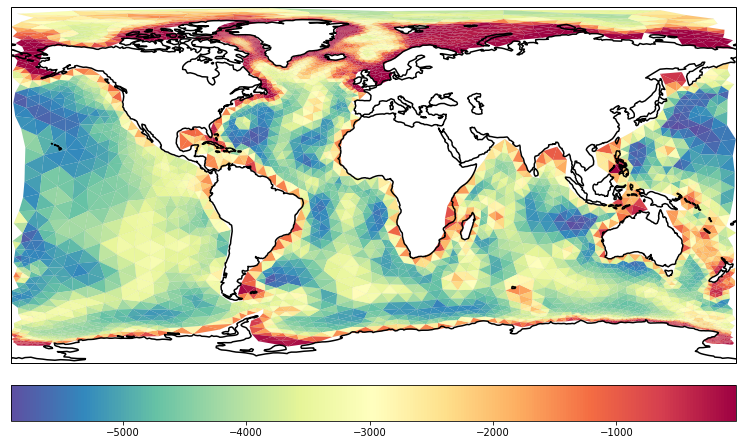

In [56]:
fig = plt.figure(figsize=(13,13))
ax = plt.subplot(111, projection=ccrs.PlateCarree())

mm = ax.tripcolor(xnodes,ynodes, elem[no_cyclic_elem], topo,
                   transform=ccrs.PlateCarree(), cmap=cm.Spectral_r, 
                  edgecolors='k', lw=0.01, alpha=1,
                  )
ax.coastlines(lw=1.5, resolution='110m')
plt.colorbar(mm, orientation='horizontal', pad=0.03)

## Global tricontourf works fine with PlateCarree

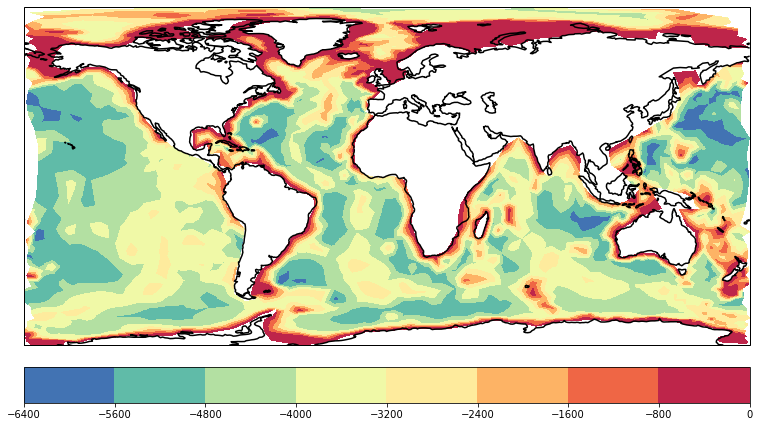

In [57]:
fig = plt.figure(figsize=(13,13))
ax = plt.subplot(111, projection=ccrs.PlateCarree())
mm = ax.tricontourf(xnodes, ynodes, elem[no_cyclic_elem], topo,
                   transform=ccrs.PlateCarree(), cmap=cm.Spectral_r)
ax.coastlines(lw=1.5, resolution='110m')
plt.colorbar(mm, orientation='horizontal', pad=0.03)

## Global tripcolor do not work with Mercator (or anything else), same for tricontourf

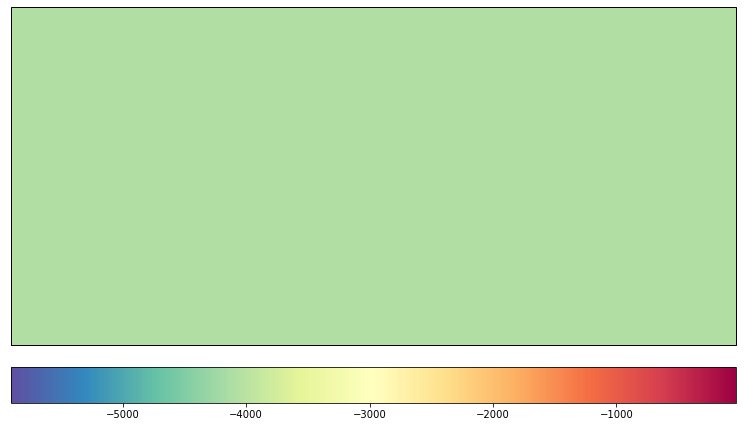

In [59]:
fig = plt.figure(figsize=(13,13))
ax = plt.subplot(111, projection=ccrs.Mercator())

mm = ax.tripcolor(xnodes,ynodes, elem[no_cyclic_elem], topo,
                   transform=ccrs.PlateCarree(), cmap=cm.Spectral_r, 
                  edgecolors='k', lw=0.01, alpha=1,
                  )
ax.coastlines(lw=1.5, resolution='110m')
plt.colorbar(mm, orientation='horizontal', pad=0.03)

## However if the map is not global Mercator is working.

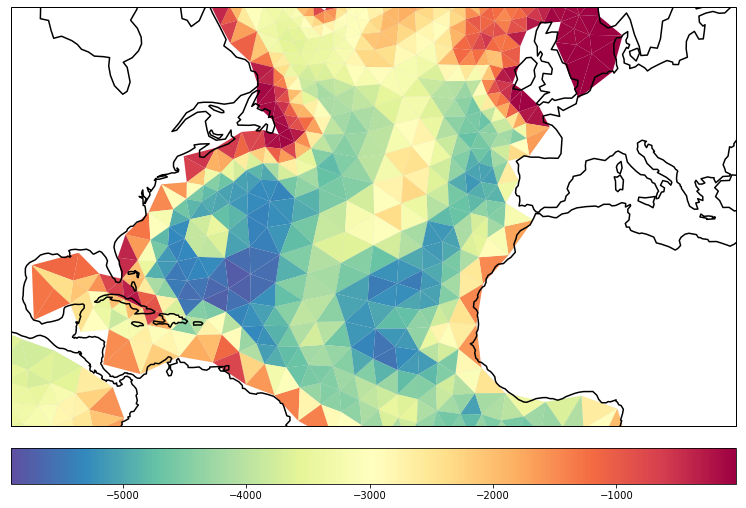

In [61]:
fig = plt.figure(figsize=(13,13))
ax = plt.subplot(111, projection=ccrs.Mercator())
ax.set_extent((-100, 30, 0, 60), crs=ccrs.PlateCarree())
mm = ax.tripcolor(xnodes,ynodes, elem[no_cyclic_elem], topo,
                   transform=ccrs.PlateCarree(), cmap=cm.Spectral_r, 
                  edgecolors='k', lw=0.01, alpha=1,
                  )
ax.coastlines(lw=1.5, resolution='110m')
plt.colorbar(mm, orientation='horizontal', pad=0.03)